<table class="table table-bordered">
    <tr>
        <th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment - Food Classification Model (Individual)</h2><h3>AY2025/26 Semester</h3></th>
    </tr>
</table>

<h3>Student Name: Lim Ai Sim Elizabeth (3440680F)</h3>

## **Introduction**

This notebook is for final testing and comparison of the two final models.

The best model will be used to predict images downloaded from the internet.

## **Environment and Data Setup**

- importing required libaries
- importing required test images for test evaluation
- preparation of AWS or Google Colab environments

In [ ]:
# AWS setup

!ln -sf /opt/conda/nvvm/libdevice/libdevice.10.bc ./libdevice.10.bc

In [ ]:
# Import the Required Packages

from tensorflow import keras
print('keras: ', keras.__version__)
# Keras version must be at least 2.6.0

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

keras:  3.8.0


In [ ]:
# FOR COLAB DATA LOADING

import os
import zipfile
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

# Define the path to your zip file and the target directory for extraction
zip_file_path = '/content/drive/My Drive/Colab Notebooks/DLIR/Food.zip'
extract_dir = '/content/drive/My Drive/Colab Notebooks/DLIR/'


#Extract the zip file (commented out once extracted)
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# Define paths to the train, validation, and test directories
train_dir = os.path.join(extract_dir, 'Food', 'train')
validation_dir = os.path.join(extract_dir, 'Food','validation')
test_dir = os.path.join(extract_dir, 'Food','test')

# check path
print(train_dir)
print(validation_dir)
print(test_dir)


newimages = '/content/drive/My Drive/Colab Notebooks/DLIR/newimages'

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/DLIR/Food/train
/content/drive/My Drive/Colab Notebooks/DLIR/Food/validation
/content/drive/My Drive/Colab Notebooks/DLIR/Food/test


In [ ]:
# FOR AWS DATALOADING

import os
import zipfile


# # Define the path to your zip file and the target directory for extraction
# zip_file_path = 'Food.zip'
# extract_dir = os.getcwd()

# # Extract the zip file (commented out once extracted)
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# Define paths to the train, validation, and test directories
train_dir = 'Food/train'
validation_dir = 'Food/validation'
test_dir = 'Food/test'

# check path
print(train_dir)
print(validation_dir)
print(test_dir)

newimages = 'newimages'

Food/train
Food/validation
Food/test


In [ ]:
# Generation  of augmented data
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input

img_size = 150

## **Evaluation of Best Final Models Using Test Images**

### **Model 1: 1-5A5**

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

Found 500 images belonging to 10 classes.


In [ ]:
# Model #1 loading and testing

model1 = keras.models.load_model('food_1_15A5_batchnorm_gelu_relu.keras')

test_loss, test_acc = model1.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

I0000 00:00:1748869226.552922    5920 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13764 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5
W0000 00:00:1748869226.990293    5991 gpu_backend_lib.cc:579] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  ipykernel_launcher.runfiles/cuda_nvcc
  ipykern/cuda_nvcc
  
  /usr/local/cuda
  /opt/conda/lib/python3.12/site-packages/tensorflow/python/platform/../../../nvidia/cuda_nvcc
  /opt/conda/lib/python3.12/site-packages/tensorflow/python/platform/../../../../nvidia/cuda_nvcc
  /opt/conda/lib/python3.12/site-packages/tensorflow/python/platform/../../cuda
  .
You can choose the search directory by setting xla_gpu_cuda_data_dir in HloModule's DebugOptions.  For most apps, setting th

 5/50 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.7977 - loss: 0.7252

I0000 00:00:1748869229.867557    5990 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.7659 - loss: 0.8871
test acc: 0.7620000243186951


/opt/conda/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


The accuracy for model 1, food_1-5A5 is 76% (0.762).

### **Model 2: food_IN6**

In [ ]:
# Test generation needs to be performed with InceptionV3 preprocess_input function.

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')

Found 500 images belonging to 10 classes.


In [ ]:
# Model #2 loading and testing

model2 = keras.models.load_model('food_IN6.keras')

test_loss, test_acc = model2.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - acc: 0.8750 - loss: 0.5881
test acc: 0.8740000128746033


The accuracy for model 2, food_IN6 is 87.4% (0.874).

## **Using the best model to perform the classification**

- Load up Model "Food_IN6"
- Download images from the internet
- Use the model to perform the classifications


**Image sources**

1. hamburger.jpg https://images.app.goo.gl/g6gQc9mRiYFYGXDE8
2. beet-salad-new-hero.jpg https://www.eatingbirdfood.com/beet-salad/
3. risotto-wiki.jpg https://en.wikipedia.org/wiki/Risotto
4. chinese seaweed salad: https://omnivorescookbook.com/chinese-seaweed-salad/


In [ ]:
# Load the model
model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/DLIR/food_IN6.keras')

In [ ]:
# Load the food list (in alphabetical order)
with open('/content/drive/My Drive/Colab Notebooks/DLIR/food_list.txt', 'r') as f:
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['beet_salad', 'beignets', 'eggs_benedict', 'hamburger', 'hot_and_sour_soup', 'huevos_rancheros', 'lasagna', 'risotto', 'seaweed_salad', 'strawberry_shortcake']


In [ ]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

### **Image 1: Hamburger**

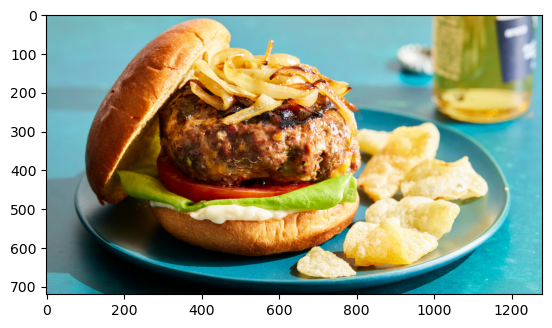

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
The prediction is:  hamburger 

      beet_salad  beignets  eggs_benedict  hamburger  hot_and_sour_soup  \
0  8.190054e-07  0.000007       0.000018   0.999964       1.280554e-07   

   huevos_rancheros       lasagna       risotto  seaweed_salad  \
0      3.150317e-07  5.229606e-07  1.670149e-07       0.000008   

   strawberry_shortcake  
0              0.000002  


In [ ]:
# Make prediction for the image you downloaded from internet
import numpy as np
import matplotlib.pyplot as plt

# Picture 1

img = 'hamburger.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

### **Image 2: Beet Salad**

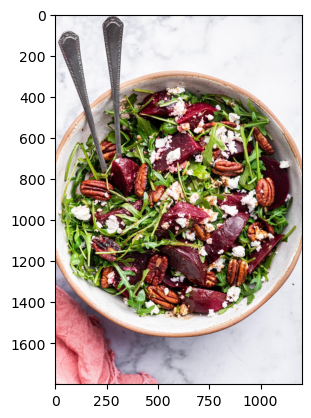

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
The prediction is:  beet_salad 

    beet_salad  beignets  eggs_benedict  hamburger  hot_and_sour_soup  \
0    0.951293  0.000003       0.000005   0.000013            0.02583   

   huevos_rancheros   lasagna   risotto  seaweed_salad  strawberry_shortcake  
0          0.000008  0.000002  0.000034       0.022802               0.00001  


In [ ]:
# Picture 2

img = 'beet-salad-new-hero.jpg'
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

### **Image 3: Risotto**

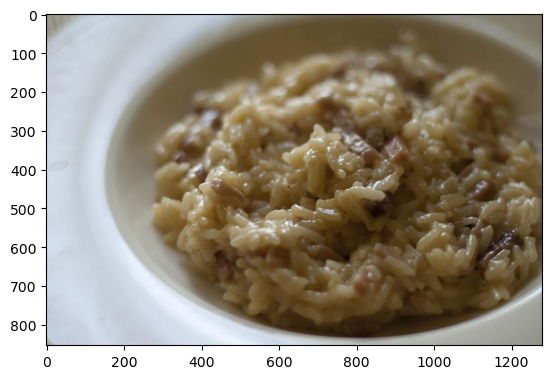

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
The prediction is:  risotto 

      beet_salad      beignets  eggs_benedict     hamburger  hot_and_sour_soup  \
0  2.382025e-10  3.067592e-09   3.660656e-10  1.686473e-09       2.588032e-10   

   huevos_rancheros       lasagna  risotto  seaweed_salad  \
0      4.616243e-11  5.100580e-08      1.0   4.861102e-10   

   strawberry_shortcake  
0          4.884877e-10  


In [ ]:
# Picture 3

img = 'risotto-wiki.jpg'
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

### **Image 4: Seaweed Salad**

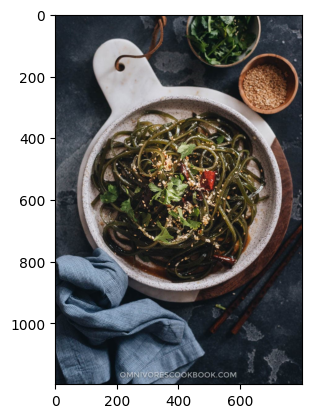

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
The prediction is:  seaweed_salad 

      beet_salad      beignets  eggs_benedict     hamburger  hot_and_sour_soup  \
0  8.635825e-07  5.498294e-08   1.211709e-09  2.164986e-08           0.062387   

   huevos_rancheros       lasagna   risotto  seaweed_salad  \
0          0.000031  1.941014e-08  0.000016       0.937565   

   strawberry_shortcake  
0          1.055280e-10  


In [ ]:
# Picture 4

img = '/content/drive/MyDrive/Colab Notebooks/DLIR/Chinese-Seaweed-Salad.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

## **Model Demo**

Model demo is available.

The model is available for testing on Hugging Face’s Spaces: https://huggingface.co/spaces/Ravenblack7575/DLIRfood


The test application uses Gradio and Hugging Face free hosting for ML project demonstration known as “Spaces” (https://huggingface.co/spaces).
